# 준비

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
import numpy as np

In [5]:
data = pd.read_csv('C:/Users/user/Desktop/DataAnalysisStudy/Ele_Charge_Analysis_R/INFRA_real.csv')

In [6]:
data

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
0,1430,0,0,0,0,3,0,0,0,0,3,0
1,1431,1,2,1,0,13,1,0,13,3,3,3
2,1556,0,0,1,0,0,0,0,0,0,1,1
3,1560,0,0,3,0,0,0,0,3,0,1,0
4,1429,0,0,1,0,6,0,0,3,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199,131,0,0,0,0,1,0,0,0,0,1,1
200,97,0,0,1,0,0,0,0,0,0,5,0
201,168,0,0,0,0,0,1,1,0,0,0,0
202,100,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data.head()

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
0,1430,0,0,0,0,3,0,0,0,0,3,0
1,1431,1,2,1,0,13,1,0,13,3,3,3
2,1556,0,0,1,0,0,0,0,0,0,1,1
3,1560,0,0,3,0,0,0,0,3,0,1,0
4,1429,0,0,1,0,6,0,0,3,1,6,3


In [8]:
data.describe()

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,626.416667,0.112745,0.107843,0.465686,0.107843,1.720588,0.083333,0.039216,1.303922,0.475490,2.710784,0.544118
std,454.959445,0.423490,0.407004,0.808696,0.407004,3.292830,0.394440,0.194585,2.529780,0.778015,4.029409,1.061189
min,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,406.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,523.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,580.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
max,2075.000000,3.000000,3.000000,4.000000,3.000000,16.000000,4.000000,1.000000,18.000000,4.000000,20.000000,5.000000


# 독립변수, 종속변수 선언

In [46]:
# 독립변수 ( data )
X = data.iloc[:,:11]

In [47]:
# 종속변수 ( target )
y = data.iloc[:,-1]

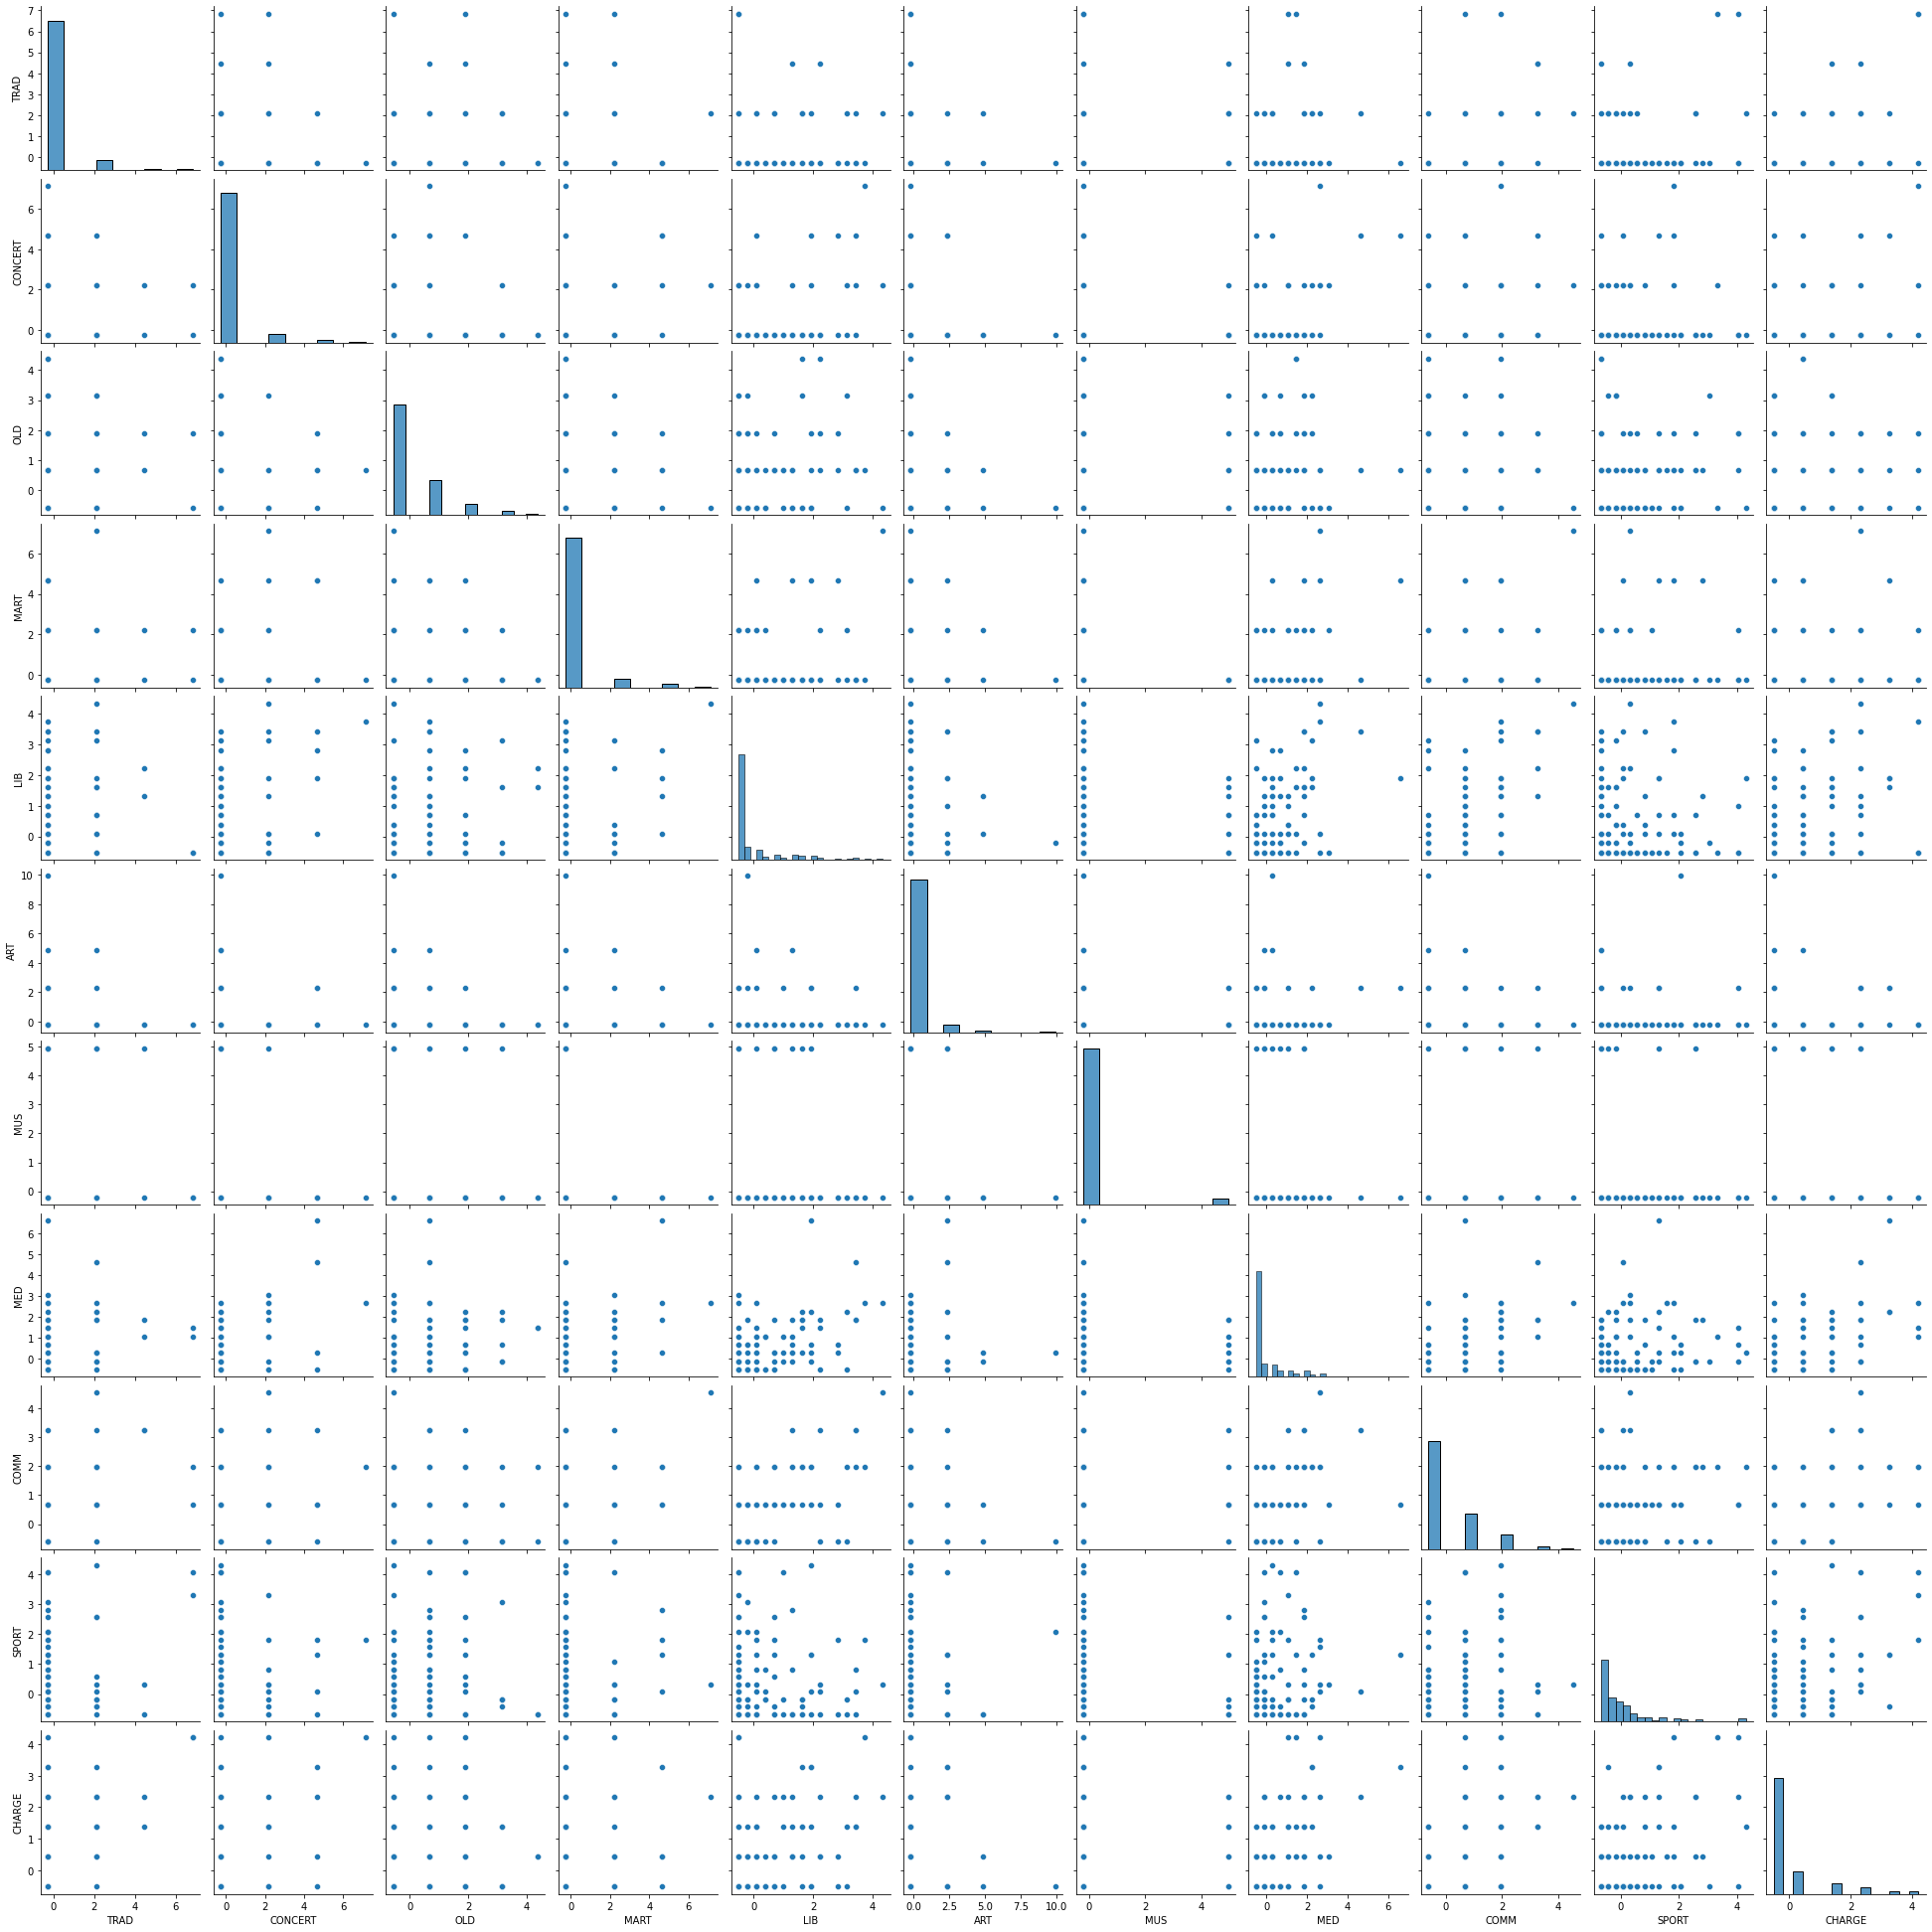

In [33]:
# 상관계수 그래프
sns.pairplot(data)

In [70]:
# 훈련, 테스트 데이터 분리 - 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# 표준화된 독립변수, 종속변수 선언

In [28]:
# Standard Scaler  ( 표준화 )
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(data.iloc[:, 1:])

In [30]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(std_data, columns=['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'COMM', 'SPORT', 'CHARGE'])

In [65]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:10]

In [66]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

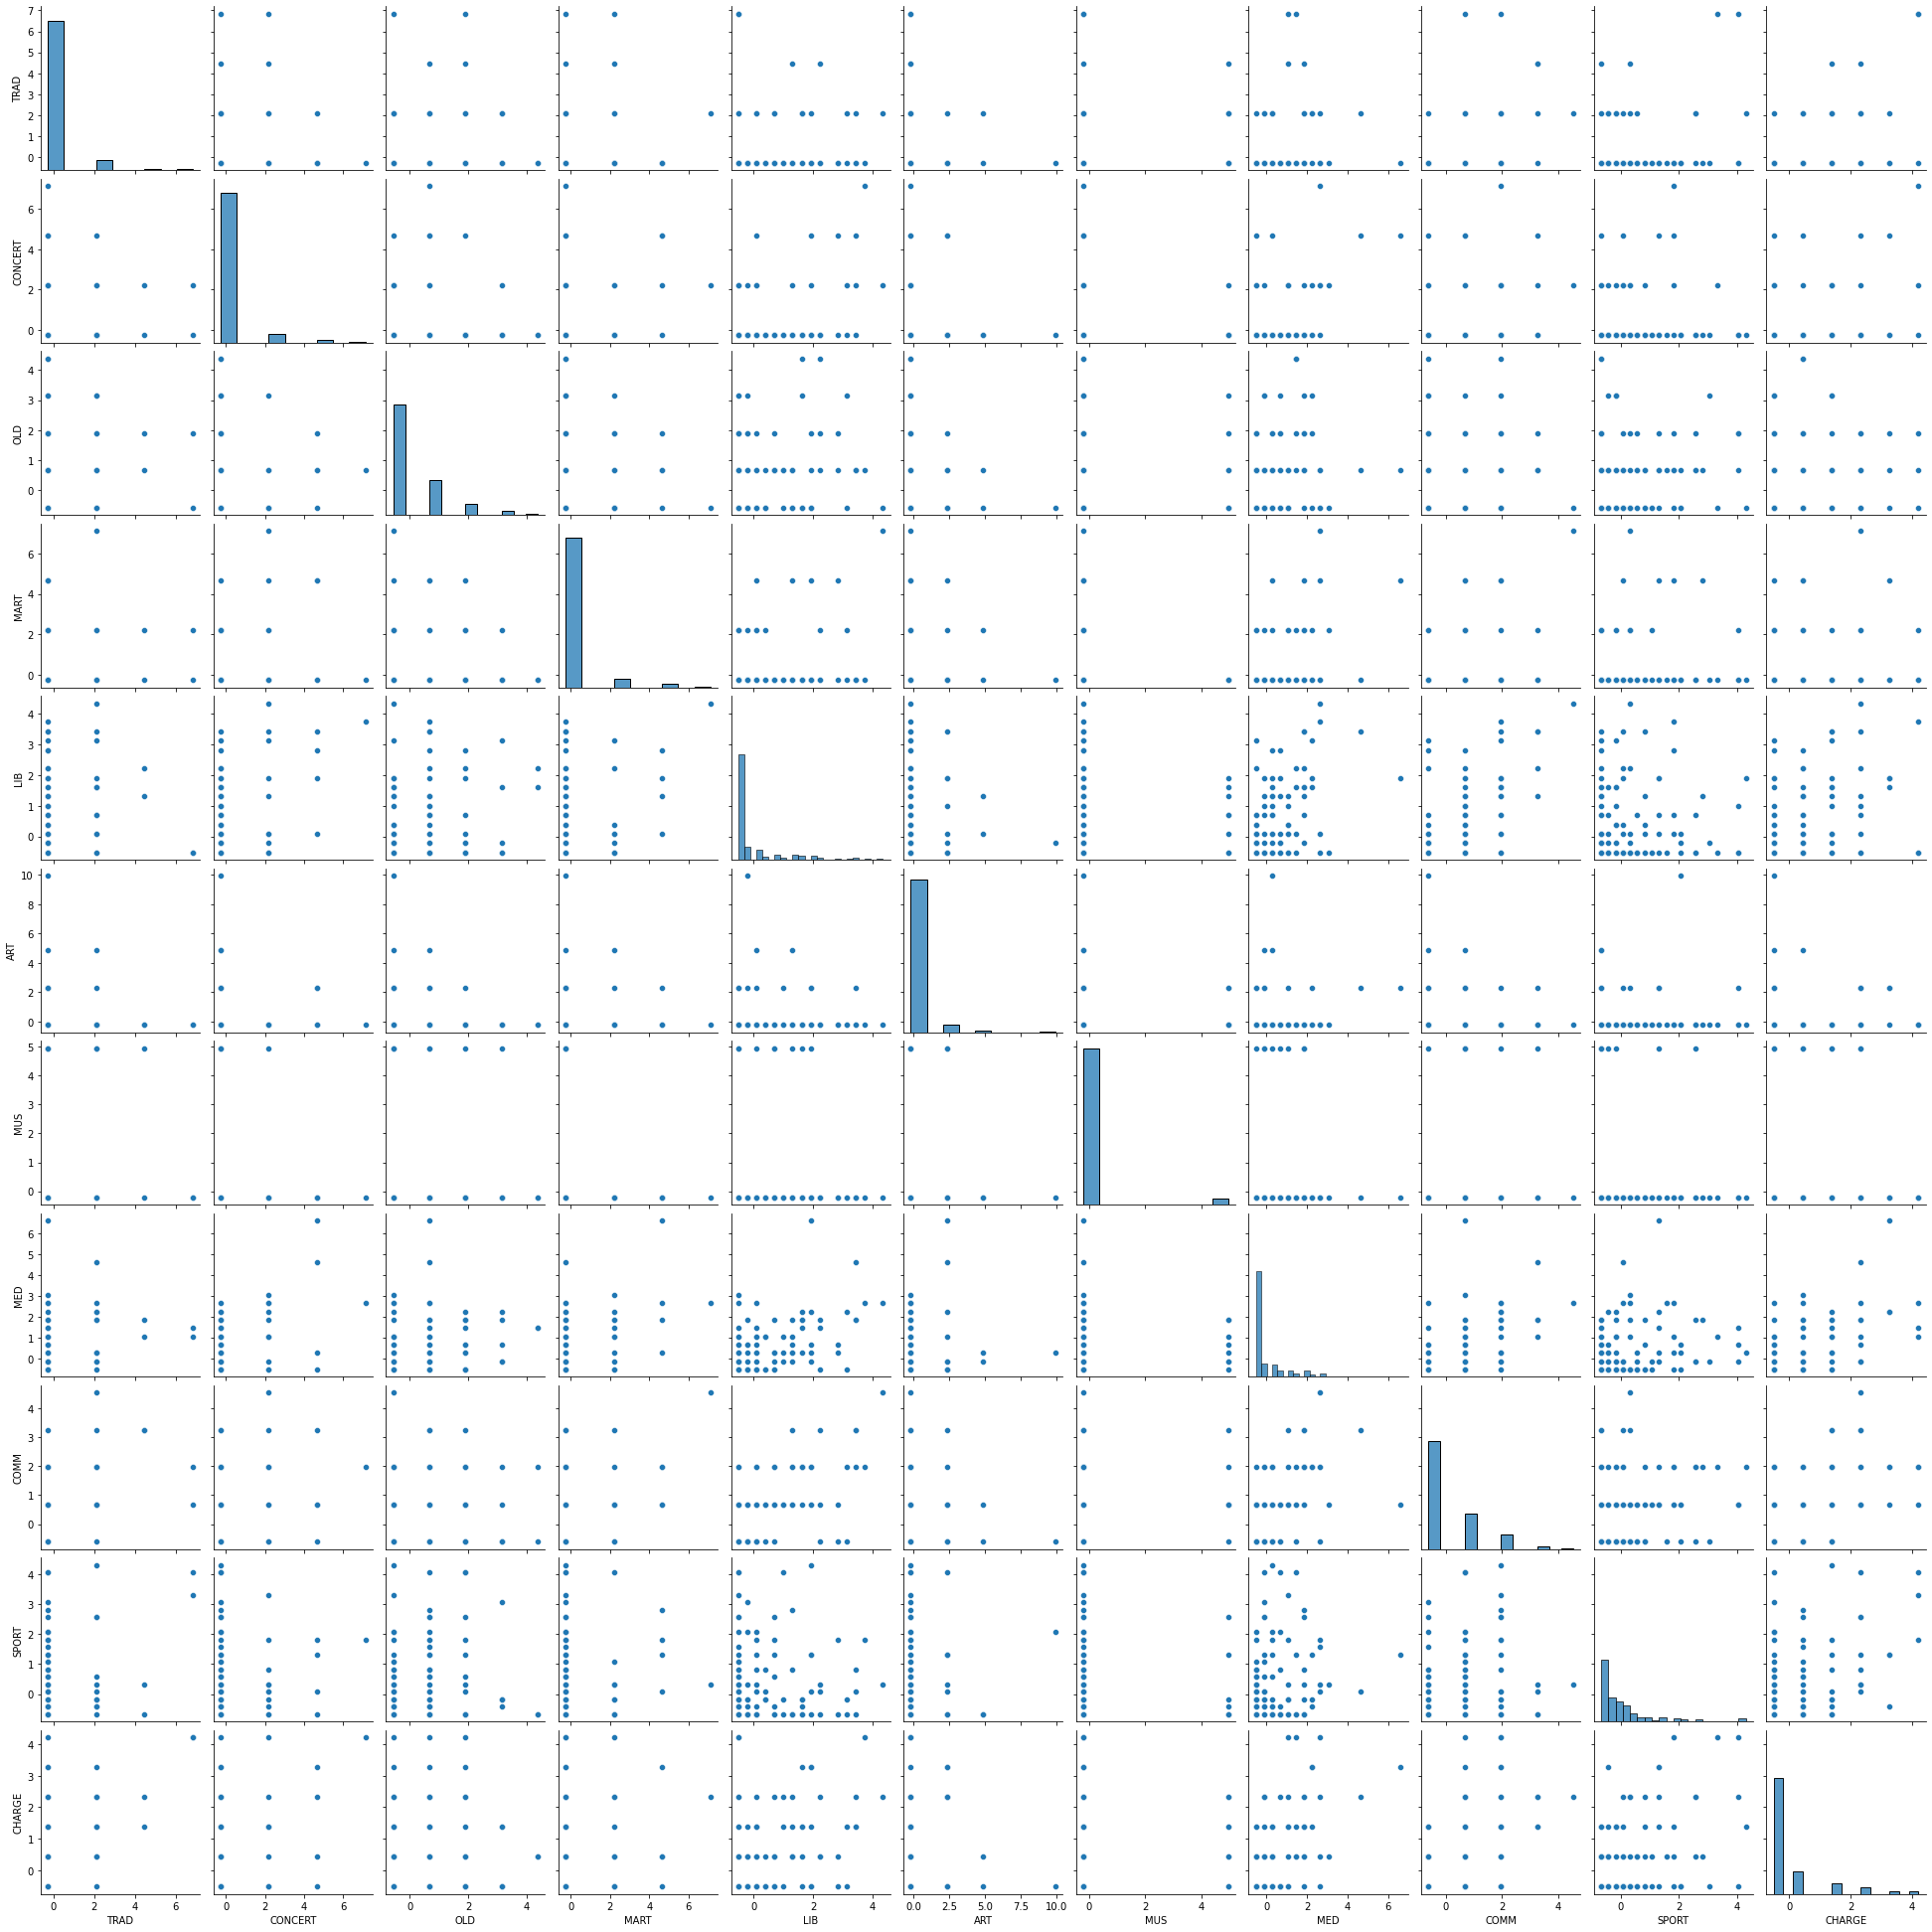

In [33]:
# 상관계수 그래프
sns.pairplot(scaled_df)

In [70]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Lasso

In [57]:
lasso = Lasso().fit(X_train, y_train)

In [58]:
print(f'훈련 세트의 정확도 : {lasso.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lasso.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.7311780959443901
테스트 세트의 정확도 : 0.32094632125256783
사용한 특성의 수 : 8
사용한 max_iter : 25


In [59]:
lasso.coef_

array([-3.29156371e-04,  7.40006507e-01,  2.02713791e-01,  0.00000000e+00,
       -2.03649843e-01,  4.91973269e-02, -0.00000000e+00, -0.00000000e+00,
        1.25533096e-01,  1.52650777e-01,  7.47731165e-02])

# Ridge

In [71]:
ridge = Ridge().fit(X_train, y_train)

In [72]:
ridge.coef_

array([ 0.29184016,  0.10050473, -0.08924327, -0.12536048,  0.15018759,
        0.03304099,  0.04756696,  0.41753289,  0.10738167,  0.20369005])

In [73]:
print(f'훈련 세트의 정확도 : {ridge.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {ridge.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(ridge.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge.n_iter_))

훈련 세트의 정확도 : 0.6712386738259075
테스트 세트의 정확도 : 0.6130470885573719
사용한 특성의 수 : 10
사용한 max_iter : None


In [81]:
# 예측 데이터 도출
y_pred = ridge.predict(X_test)

In [80]:
# 타겟 데이터와 예측 데이터 사이의 잔차 계산
y_residual = y_test - y_pred

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("w list")
plt.ylabel("w size")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-25, 25)
plt.show()

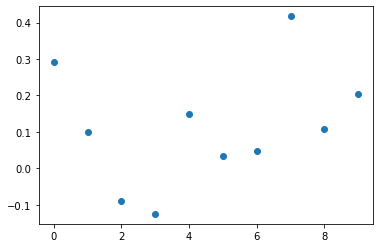

In [82]:
plt.plot(ridge.coef_, 'o', label="Ridge alpha=0")
plt.show()